https://www.kaggle.com/datasets/agileteam/bigdatacertificationkr
# 작업형 1번

## T1-1. 이상치를 찾아라(IQR활용) Expected Questions

### Q. 데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv('data/BDC/titanic/train.csv')

In [2]:
# 간단한 탐색적 데이터 분석 (EDA)
print(df.shape)
print(df.isnull().sum())
df.head()

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# IQR 구하기
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)

# numpy 활용시
# Q1 = np.percentile(df['Fare'], 25)
# Q3 = np.percentile(df['Fare'], 75)

IQR = Q3 - Q1
Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

(-26.724, 65.6344)

In [4]:
# 이상치 데이터 구하기
outdata1 = df[df['Fare']<(Q1 - 1.5 * IQR)]
outdata2 = df[df['Fare']>(Q3 + 1.5 * IQR)]
len(outdata1), len(outdata2)

(0, 116)

In [5]:
# 이상치 데이터에서 여성 수 구하기, 출력하기 print()
print(sum(outdata2['Sex'] == 'female'))

70


## T1-2. 이상치를 찾아라(소수점 나이) Expected Questions

### Q. 주어진 데이터에서 이상치(소수점 나이)를 찾고 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한 다음 모두 더하여 출력하시오

In [9]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [10]:
# 소수점 데이터 찾기
df = df[(df['age']-np.floor(df['age']))!= 0]
df

,id,age,city,f1,f2,f3,f4,f5
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
46,id47,34.6,대구,75.0,1,NaN,ESTJ,90.496999
64,id65,26.5,경기,NaN,0,NaN,ISFP,91.297791
84,id85,83.6,경기,55.0,0,NaN,INFJ,80.138280
92,id93,21.8,경기,57.0,0,NaN,ISFP,73.586397


In [11]:
# 이상치를 포함한 데이터 올림, 내림, 버림의 평균값 

# 올림
m_ceil = np.ceil(df['age']).mean()

# 내림
m_floor = np.floor(df['age']).mean()

# 버림
m_trunc = np.trunc(df['age']).mean()

m_ceil, m_floor, m_trunc

(23.75, 22.75, 23.0)

In [12]:
# 평균값 더한 다음 출력
print(m_ceil + m_floor + m_trunc)

69.5


## T1-3. 결측치 처리(map 활용) Expected Questions

### Q. 주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고, 80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 'f1'컬럼의 평균값을 출력하세요!

In [13]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [14]:
# EDA - 결측값 확인
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [15]:
# 데이터 shape
df.shape

(100, 8)

In [16]:
# EDA - 결측비율 확인
df.isnull().sum()/df.shape[0]

id      0.00
age     0.00
city    0.00
f1      0.31
f2      0.00
f3      0.95
f4      0.00
f5      0.00
dtype: float64

In [17]:
# f3 컬럼 삭제
print("삭제 전:", df.shape)
df = df.drop(['f3'], axis=1)
print("삭제 후:", df.shape)

# 결측치가 있는 컬럼을 제거하는 2가지 방법
# df.drop(['B', 'C'], axis=1)
# df.drop(columns=['B', 'C'])

삭제 전: (100, 8)
삭제 후: (100, 7)


In [18]:
# 도시 확인
df['city'].unique()

array(['서울', '부산', '대구', '경기'], dtype=object)

In [19]:
# 도시별 중앙값 계산
s=df[df['city']=='서울']['f1'].median()
k=df[df['city']=='경기']['f1'].median()
b=df[df['city']=='부산']['f1'].median()
d=df[df['city']=='대구']['f1'].median()
s, k, b, d

#방법2
# k, d, b, s = df.groupby('city')['f1'].median()

(68.0, 58.0, 62.0, 75.0)

In [20]:
# 대체 전 데이터 샘플 출력
df[18:21]

,id,age,city,f1,f2,f4,f5
18,id19,53.0,서울,NaN,0,ISFP,83.685380
19,id20,11.0,서울,51.0,1,INTJ,91.297791
20,id21,90.0,부산,NaN,1,ISFP,29.269869


In [21]:
# f1결측치 city별 중앙값으로 대체
df['f1'] = df['f1'].fillna(df['city'].map({'서울':s,'경기':k,'부산':b,'대구':d}))

# 만약 그냥 f1 중앙값으로 대체 한다면 
# df['f1'] = df['f1'].fillna(df['f1'].median())

In [22]:
# 대체 후 데이터 샘플 출력
df[18:21]

,id,age,city,f1,f2,f4,f5
18,id19,53.0,서울,68.0,0,ISFP,83.685380
19,id20,11.0,서울,51.0,1,INTJ,91.297791
20,id21,90.0,부산,62.0,1,ISFP,29.269869


In [23]:
#결과 출력
print(df['f1'].mean())

65.52


## T1-4. 왜도와 첨도 구하기 (로그스케일) Expected Questions

### Q. 주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
df = pd.read_csv("data/BDC/house-prices-advanced-regression-techniques/train.csv")
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<AxesSubplot:>

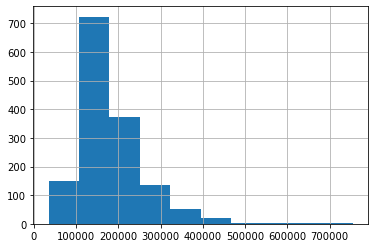

In [3]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [4]:
# 'SalePrice'컬럼 왜도와 첨도계산
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
print("왜도:" ,s1)
print("첨도:" ,k1)

왜도: 1.8828757597682129
첨도: 6.536281860064529


In [5]:
# 'SalePrice'컬럼 로그변환
df['SalePrice'] = np.log1p(df['SalePrice'])

<AxesSubplot:>

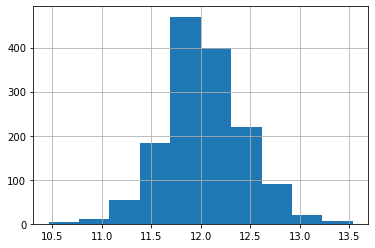

In [6]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [7]:
# 'SalePrice'컬럼 왜도와 첨도계산
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurt()
print("왜도:" ,s2)
print("첨도:" ,k2)

왜도: 0.12134661989685329
첨도: 0.809519155707878


In [8]:
# 모두 더한 다음 출력
print(round(s1+s2+k1+k2,2))

9.35


## T1-5. 조건에 맞는 데이터 표준편차 구하기 Expected Questions

### Q. 주어진 데이터 중 basic1.csv에서 'f4'컬럼 값이 'ENFJ'와 'INFP'인 'f1'의 표준편차 차이를 절대값으로 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# 조건에 맞는 데이터
df[df['f4']=='ENFJ']

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
32,id33,47.0,부산,94.0,0,NaN,ENFJ,17.252986
40,id41,81.0,대구,55.0,0,NaN,ENFJ,37.113739
44,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
53,id54,53.0,대구,NaN,1,NaN,ENFJ,69.730313


In [3]:
df[df['f4']=='ENFJ']['f1'].std()

17.727097901235837

In [4]:
# 조건에 맞는 f1의 표준편차
enfj = df[df['f4']=='ENFJ']['f1'].std()
enfj

17.727097901235837

In [5]:
# 조건에 맞는 f1의 표준편차
infp = df[df['f4']=='INFP']['f1'].std()
infp

23.586719427112648

In [6]:
# 두 표준편차 차이 절대값 출력
print(np.abs(enfj - infp))

5.859621525876811


## T1-6. 결측치 제거 및 그룹 합계 Expected Questions

### Q. 주어진 데이터 중 basic1.csv에서 'f1'컬럼 결측 데이터를 제거하고, 'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# f1컬럼 결측치 제거
df = df[~df['f1'].isnull()]

In [3]:
# 그룹 합계 계산
df2 = df.groupby(['city','f2']).sum()
df2

age     f1          f5
city f2                          
경기   0   720.4  833.0  943.944823
     1   696.0  670.0  657.241212
     2   239.0  311.0  362.300060
대구   0   387.0  527.0  183.199568
     1   217.6  235.0  241.333824
     2   140.0  211.0   79.667919
부산   0   331.0  389.0  284.371097
     1   188.7  315.0  299.270973
     2   -13.5   47.0   67.886373
서울   0   145.0  278.0  218.528577
     1   315.3  534.0  438.485010
     2    68.3  207.0  126.661135

In [4]:
# 조건에 맞는 값 출력
print(df2.iloc[0]['f1'])

833.0


## T1-7. 값 변경 및 2개 이상의 조건 Expected Questions

### Q. 'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고, 'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오!

In [5]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [6]:
# ESFJ 값을 가진 데이터 확인
df[df['f4'] == 'ESFJ']

,id,age,city,f1,f2,f3,f4,f5
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
12,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
30,id31,86.0,부산,77.0,0,NaN,ESFJ,73.586397
58,id59,64.0,대구,NaN,1,NaN,ESFJ,20.129444
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [7]:
# 값 변경하기
df['f4'] = df['f4'].replace('ESFJ', 'ISFJ')

In [8]:
# ESFJ 값을 가진 데이터 확인
df[df['f4'] == 'ESFJ']

,id,age,city,f1,f2,f3,f4,f5


In [9]:
# 2개의 조건에 맞는 값
df[(df['f4'] == 'ISFJ') & (df['city'] == '경기')]

,id,age,city,f1,f2,f3,f4,f5
62,id63,88.0,경기,86.0,1,NaN,ISFJ,73.586397
66,id67,66.0,경기,52.0,1,NaN,ISFJ,73.586397
72,id73,90.0,경기,NaN,1,NaN,ISFJ,73.586397
80,id81,86.0,경기,50.0,1,NaN,ISFJ,37.113739
98,id99,1.0,경기,47.0,0,NaN,ISFJ,97.381034


In [10]:
# 2개의 조건에 맞는 값중 age컬럼의 최대값
df[(df['f4'] == 'ISFJ') & (df['city'] == '경기')]['age'].max()

90.0

## T1-8. 누적합 그리고 보간(결측치 처리) Expected Questions
### Q. 주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다. 이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고, 누적합의 평균값을 출력한다. (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# 조건에 따른 누적합
df2 = df[df['f2']==1]['f1'].cumsum()
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16       NaN
19     534.0
20       NaN
21     606.0
22     681.0
25     738.0
27     772.0
33       NaN
35     849.0
37       NaN
46     924.0
49    1002.0
51    1084.0
53       NaN
55       NaN
58       NaN
62    1170.0
65       NaN
66    1222.0
69    1318.0
72       NaN
77    1414.0
80    1464.0
82    1514.0
86       NaN
88    1580.0
91    1658.0
93       NaN
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [3]:
# 결측치 처리 (뒤에 나오는 값으로 채움)
df2 = df2.fillna(method = 'bfill')
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16     534.0
19     534.0
20     606.0
21     606.0
22     681.0
25     738.0
27     772.0
33     849.0
35     849.0
37     924.0
46     924.0
49    1002.0
51    1084.0
53    1170.0
55    1170.0
58    1170.0
62    1170.0
65    1222.0
66    1222.0
69    1318.0
72    1414.0
77    1414.0
80    1464.0
82    1514.0
86    1580.0
88    1580.0
91    1658.0
93    1701.0
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [4]:
# 평균 출력
print(df2.mean())

980.3783783783783


## T1-9. 수치형 변수 표준화 Expected Questions

### Q. 주어진 데이터에서 'f5'컬럼을 표준화(Standardization (Z-score Normalization))하고 그 중앙값을 구하시오

In [5]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head(2)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826


In [6]:
# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['f5']=scaler.fit_transform(df[['f5']])
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,1.220815
1,id02,9.0,서울,70.0,1,NaN,ENFJ,0.127343
2,id03,27.0,서울,61.0,1,NaN,ISTJ,-1.394535
3,id04,75.0,서울,NaN,2,NaN,INFP,-0.143667
4,id05,24.0,서울,85.0,2,NaN,ISFJ,-0.970085


In [7]:
# 중앙값 출력
print(df['f5'].median())

0.260619629559015


## T1-10. 여-존슨과 박스-칵스 변환 Expected Questions

### Q. 주어진 데이터에서 20세 이상인 데이터를 추출하고 'f1'컬럼을 결측치를 최빈값으로 채운 후, f1 컬럼의 여-존슨과 박스콕스 변환 값을 구하고, 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import power_transform

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# 조건에 맞는 데이터
print("조건 적용 전:", df.shape)
df = df[df['age']>=20]
print("조건 적용 후:", df.shape)

조건 적용 전: (100, 8)
조건 적용 후: (83, 8)


In [3]:
# 최빈값으로 'f1' 컬럼 결측치 대체
print("결측치 처리 전: \n", df.isnull().sum())
print("최빈값: ",df['f1'].mode()[0])
df['f1'] = df['f1'].fillna(df['f1'].mode()[0])
print("결측치 처리 후: \n", df.isnull().sum())  

결측치 처리 전: 
 id       0
age      0
city     0
f1      26
f2       0
f3      78
f4       0
f5       0
dtype: int64
최빈값:  50.0
결측치 처리 후: 
 id       0
age      0
city     0
f1       0
f2       0
f3      78
f4       0
f5       0
dtype: int64


In [4]:
# 'f1'데이터 여-존슨 yeo-johnson 값 구하기
df['y'] = power_transform(df[['f1']]) # method 디폴트 값은 여-존슨’yeo-johnson’
df['y'].head()

2    0.101083
3   -0.585402
4    1.463459
5   -0.143094
6    0.040578
Name: y, dtype: float64

In [5]:
# 'f1'데이터 여-존슨 yeo-johnson 값 구하기
df['y'] = power_transform(df[['f1']],standardize=False) # method 디폴트 값은 여-존슨’yeo-johnson’
df['y'].head()

2    20.583423
3    17.968081
4    25.773745
5    19.653167
6    20.352915
Name: y, dtype: float64

In [6]:
# 'f1'데이터 박스-콕스 box-cox 값 구하기
df['b'] = power_transform(df[['f1']], method='box-cox')
df['b'].head()

2    0.100290
3   -0.585656
4    1.463969
5   -0.143784
6    0.039801
Name: b, dtype: float64

In [7]:
# 'f1'데이터 박스-콕스 box-cox 값 구하기
# 추가 2022.6.21 
# standardize=False는 python과 R의 디폴트가 달라 결과를 맞추기 위함이었어요! 이번 문제는 출제 가능성이 낮아 보여요 (이미 풀이한 분들이 있어 그대로 두었습니다.)
df['b'] = power_transform(df[['f1']], method='box-cox', standardize=False)
df['b'].head()

2    21.067090
3    18.305263
4    26.557680
5    20.084373
6    20.823545
Name: b, dtype: float64

In [8]:
## 박스콕스 방법2
from scipy import stats
x = stats.boxcox(df['f1'])
x

(array([21.06708963, 18.30526339, 26.55768035, 20.08437308, 20.82354518,
        29.92014531, 24.11822145, 22.73510574, 18.30526339, 18.30526339,
        22.50057067, 26.55768035, 18.30526339, 26.98922326, 18.30526339,
        18.30526339, 24.34492284, 16.71079154, 18.30526339, 20.08437308,
        20.82354518, 13.87430354, 24.79522903, 21.78961595, 28.47348934,
        18.30526339, 18.30526339, 24.79522903, 18.30526339, 18.30526339,
        18.30526339, 24.34492284, 19.58413906, 17.78149172, 20.82354518,
        18.30526339, 27.20371231, 18.30526339, 24.34492284, 27.20371231,
        25.01886992, 18.30526339, 25.90374858, 18.30526339, 18.30526339,
        21.55009593, 18.30526339, 18.30526339, 18.30526339, 21.30926334,
        18.30526339, 26.77388371, 21.30926334, 18.30526339, 18.30526339,
        18.8218693 , 16.98150238, 26.55768035, 26.34059949, 18.30526339,
        29.30451942, 17.51679388,  6.25392523, 12.96923731, 28.89049464,
        18.30526339, 20.82354518, 18.30526339, 18.3

In [9]:
# 두 값의 차이를 절대값으로 구한다음 모두 더해 소수점 둘째 자리까지 출력(반올림)
round(sum(np.abs(df['y'] - df['b'])),2)

39.17

## T1-11. min-max 기준 상하위 5%값 Expected Questions

### Q. 주어진 데이터에서 'f5'컬럼을 min-max 스케일 변환한 후, 상위 5%와 하위 5% 값의 합을 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
#결측치 확인
print(df.isnull().sum())

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64


In [3]:
# min-max scale 방법1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['f5_1'] = scaler.fit_transform(df[['f5']])

In [4]:
# min-max scale 방법2
df['f5_2'] = df['f5'].transform(lambda x: ((x - x.min()) / (x.max() - x.min())))

In [5]:
# 방법1과 2 비교
print(df.head())

     id   age city    f1  f2   f3    f4         f5      f5_1      f5_2
0  id01   2.0   서울   NaN   0  NaN  ENFJ  91.297791  0.919533  0.919533
1  id02   9.0   서울  70.0   1  NaN  ENFJ  60.339826  0.570252  0.570252
2  id03  27.0   서울  61.0   1  NaN  ISTJ  17.252986  0.084129  0.084129
3  id04  75.0   서울   NaN   2  NaN  INFP  52.667078  0.483685  0.483685
4  id05  24.0   서울  85.0   2  NaN  ISFJ  29.269869  0.219708  0.219708


In [7]:
# 하위 5%, 상위 5% 값 구하기
lower = df['f5_1'].quantile(0.05)
print('하위 5%:', lower)

upper = df['f5_1'].quantile(0.95)
print('상위 5%:', upper)

print('하위 5% + 상위 5%:', lower + upper)

하위 5%: 0.03670782406038746
상위 5%: 0.9881662742993513
하위 5% + 상위 5%: 1.0248740983597389


## T1-12. 상위 10개, 하위 10개 차이 Expected Questions

### Q. 주어진 데이터에서 상위 10개 국가의 접종률 평균과 하위 10개 국가의 접종률 평균을 구하고, 그 차이를 구해보세요. (단, 100%가 넘는 접종률 제거, 소수 첫째자리까지 출력)

In [8]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/covid-vaccination-vs-death/covid-vaccination-vs-death_ratio.csv')
df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40295077.0,1.113977
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40295077.0,1.167242
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40295077.0,1.182197
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40295077.0,1.189654
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40295077.0,1.190155


In [9]:
#시간에 따라 접종률이 점점 올라감
df2 = df.groupby('country').max()
df2 = df2.sort_values(by='ratio', ascending = False)
# print(df2['ratio'].head())

In [10]:
#이상치 제거
df2 = df2[1:]
# print(df2['ratio'].head())

In [11]:
#상위 10개 데이터 평균
top = df2['ratio'].head(10).mean()
bottom = df2['ratio'].tail(10).mean()

In [12]:
print(round(top - bottom,1))

88.4


## T1-13. 상관관계 구하기 Expected Questions

### Q. 주어진 데이터에서 상관관계를 구하고, quality와의 상관관계가 가장 큰 값과, 가장 작은 값을 구한 다음 더하시오! 단, quality와 quality 상관관계 제외, 소수점 둘째 자리까지 출력

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv("data/BDC/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
#print(df.head())

In [2]:
# 상관관계 구하기 
df_corr = df.corr()
df_corr = df_corr[:-1] # quailiy-quailiy 상관관계 제거
# print(df_corr['quality'])

In [3]:
# 상관관계가 가장 큰 값과 가장 작은 값 (절대값으로 확인)
max_corr=abs(df.corr()['quality'][:-1]).max()  #0.47
min_corr=abs(df.corr()['quality'][:-1]).min()   #0.013

if max_corr not in df.corr()[['quality']][:-1].values:
    max_corr=-max_corr
if min_corr not in df.corr()[['quality']][:-1].values:
    min_corr=-min_corr

In [4]:
ans=round(max_corr+min_corr,2)
print(ans) 

0.49


## T1-14. 2개 조건에 따른 상위 값 Expected Question

### Q. city와 f4를 기준으로 f5의 평균값을 구한 다음, f5를 기준으로 상위 7개 값을 모두 더해 출력하시오 (소수점 둘째자리까지 출력)

In [5]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [6]:
# city와 f4별 f5의 평균 값 (멀티인덱스 출력)
df = df.groupby(['city', 'f4'])[['f5']].mean()
print(df)

                  f5
city f4             
경기   ENTJ  51.693799
     ENTP  54.704075
     ESFJ  97.381034
     ESFP  53.187491
     ESTJ  79.487043
     ESTP  34.022130
     INFJ  80.138280
     INFP  90.531801
     INTJ  80.388795
     INTP  55.887974
     ISFJ  64.468233
     ISFP  69.108148
     ISTP  48.431184
대구   ENFJ  39.964658
     ENFP  32.574085
     ENTP  13.049921
     ESFJ  20.129444
     ESTJ  77.323257
     ESTP  28.915814
     INTP  26.698797
     ISFJ  59.883434
     ISTJ  83.685380
     ISTP  29.269869
부산   ENFJ  17.252986
     ENFP  68.176229
     ENTP  74.012327
     ESFJ  73.586397
     ESTJ  25.280992
     ESTP  62.730150
     INFJ  53.447698
     INFP  48.431184
     INTP  13.049921
     ISFJ  13.049921
     ISFP  29.269869
     ISTP  69.730313
서울   ENFJ  75.818808
     ENFP  98.429899
     ENTJ  67.886373
     ENTP   9.796378
     ESFJ  50.469183
     ESFP  16.283854
     ESTP  91.297791
     INFJ  83.685380
     INFP  52.667078
     INTJ  91.297791
     INTP  20

In [7]:
# dataframe 전환 후 상위 7개 출력
df = df.reset_index().sort_values('f5', ascending=False).head(7)
print(df)

   city    f4         f5
36   서울  ENFP  98.429899
2    경기  ESFJ  97.381034
44   서울  INTJ  91.297791
41   서울  ESTP  91.297791
47   서울  ISFP  91.057640
7    경기  INFP  90.531801
42   서울  INFJ  83.685380


In [8]:
# f7의 합계 (소수점 둘째자리까지)
round(df['f5'].sum(), 2)

643.68

## T1-15. 슬라이싱 & 조건 Expected Question

### Q. 주어진 데이터 셋에서 age컬럼 상위 20개의 데이터를 구한 다음 f1의 결측치를 중앙값으로 채운다. 그리고 f4가 ISFJ와 f5가 20 이상인 f1의 평균값을 출력하시오!

In [9]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [10]:
# 나이 순(내림차순)으로 정렬
df = df.sort_values('age', ascending=False).reset_index(drop=True)
print(df)

      id    age city     f1  f2   f3    f4         f5
0   id97  100.0   경기    NaN   0  NaN  INFP  67.886373
1   id37  100.0   부산    NaN   0  NaN  ESTP  33.308999
2   id45   97.0   대구   88.0   0  NaN  ENFJ  13.049921
3   id52   97.0   대구   82.0   1  NaN  ISFJ  90.496999
4   id92   97.0   경기   78.0   1  NaN  INFP  97.381034
..   ...    ...  ...    ...  ..  ...   ...        ...
95  id99    1.0   경기   47.0   0  NaN  ESFJ  97.381034
96  id58    0.0   대구  100.0   2  NaN  ESTP  33.308999
97  id22   -6.3   부산   72.0   1  NaN  ENFP  52.667078
98  id70   -9.0   경기   96.0   1  NaN  ISTP  48.431184
99  id29  -13.5   부산   47.0   2  NaN  ENTP  67.886373

[100 rows x 8 columns]


In [11]:
# 상위 20개 슬라이싱
df = df[:20]
print(df)

      id    age city    f1  f2   f3    f4         f5
0   id97  100.0   경기   NaN   0  NaN  INFP  67.886373
1   id37  100.0   부산   NaN   0  NaN  ESTP  33.308999
2   id45   97.0   대구  88.0   0  NaN  ENFJ  13.049921
3   id52   97.0   대구  82.0   1  NaN  ISFJ  90.496999
4   id92   97.0   경기  78.0   1  NaN  INFP  97.381034
5   id10   95.0   서울  74.0   1  NaN  ISFP  98.429899
6   id46   93.0   대구   NaN   0  NaN  ESTJ  67.886373
7   id78   92.0   경기  96.0   1  NaN  INTJ  69.730313
8   id96   92.0   경기  53.0   1  NaN  ENTJ  52.667078
9   id73   90.0   경기   NaN   1  NaN  ISFJ  73.586397
10  id21   90.0   부산   NaN   1  NaN  ISFP  29.269869
11  id88   89.0   경기  75.0   0  NaN  ESTJ  60.339826
12  id63   88.0   경기  86.0   1  NaN  ISFJ  73.586397
13  id66   87.0   경기   NaN   1  NaN  ISFP  17.252986
14  id38   87.0   부산   NaN   1  NaN  ESTP  83.685380
15  id61   87.0   경기  62.0   2  NaN  INTP  69.730313
16  id50   86.0   대구  78.0   1  NaN  ENFP  60.339826
17  id81   86.0   경기  50.0   1  NaN  ISFJ  37.

In [12]:
# 결측치 채우기 (중앙값)
df['f1'] = df['f1'].fillna(df['f1'].median())

In [13]:
# 조건 ISFJ, f5가 20이상
cond = (df['f4']=='ISFJ') & (df['f5'] >= 20)

In [14]:
# f1의 평균
df[cond]['f1'].mean()

73.875

## T1-16. 분산 Expected Question

### Q. 주어진 데이터 셋에서 f2가 0값인 데이터를 age를 기준으로 오름차순 정렬하고 앞에서 부터 20개의 데이터를 추출한 후 f1 결측치(최소값)를 채우기 전과 후의 분산 차이를 계산하시오 (소수점 둘째 자리까지)

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# f2가 0인 데이터 정렬(age 오름차순)
cond = (df['f2']==0)
df = df[cond].sort_values('age', ascending=True).reset_index(drop=True)

In [3]:
# 앞에서 부터 20개의 데이터 
df = df[:20]

In [4]:
# f1 결측치(최소값)를 채우기 전과 후의 분산
df_var1 = df['f1'].var()
df['f1'] = df['f1'].fillna(df['f1'].min())
df_var2 = df['f1'].var()

In [5]:
# 소수점 둘째자리까지 출력
print(round(df_var1 - df_var2, 2))

38.44


In [6]:
# 추가 설명 판다스와 넘파이 기본값 비교

import numpy as np
print("numpy:", np.var(df['f1']))
print("pandas(ddof=0):",df['f1'].var(ddof=0))

print("pandas:",df['f1'].var())
print("numpy(ddof=1):", np.var(df['f1'], ddof=1))

numpy: 297.6600000000001
pandas(ddof=0): 297.6600000000001
pandas: 313.32631578947377
numpy(ddof=1): 313.32631578947377


## T1-17. 시계열 데이터1 Expected Question

### Q. 2022년 5월 sales의 중앙값을 구하시오

In [7]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv')
df.head()

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    730 non-null    object 
 1   Sales   730 non-null    int64  
 2   PV      730 non-null    int64  
 3   UV      684 non-null    float64
 4   Events  730 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 28.6+ KB


In [9]:
# datetime으로 type변경
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


In [10]:
# 새로운 컬럼 추가 (년, 월, 일)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [11]:
df.head()

,Date,Sales,PV,UV,Events,year,month,day
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1
1,2022-01-02,36779,3969,2289.0,0,2022,1,2
2,2022-01-03,13943875,373890,NaN,1,2022,1,3
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4
4,2022-01-05,2395374,190684,NaN,0,2022,1,5


In [12]:
# 문제 조건에 맞는 값 구하기
cond = (df['year']==2022) & (df['month']==5)
print(df[cond]['Sales'].median())

1477685.0


## T1-18. 시계열 데이터2 Expected Question

### Q. 주어진 데이터에서 2022년 5월 주말과 평일의 sales컬럼 평균값 차이를 구하시오 (소수점 둘째자리까지 출력, 반올림)

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv', parse_dates=['Date'])

In [2]:
df.head()

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


In [4]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

df.head()

,Date,Sales,PV,UV,Events,year,month,day,dayofweek
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1,5
1,2022-01-02,36779,3969,2289.0,0,2022,1,2,6
2,2022-01-03,13943875,373890,NaN,1,2022,1,3,0
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4,1
4,2022-01-05,2395374,190684,NaN,0,2022,1,5,2


In [5]:
df['weekend'] = df['dayofweek'].apply(lambda x: x>=5)

df.head()

,Date,Sales,PV,UV,Events,year,month,day,dayofweek,weekend
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1,5,True
1,2022-01-02,36779,3969,2289.0,0,2022,1,2,6,True
2,2022-01-03,13943875,373890,NaN,1,2022,1,3,0,False
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4,1,False
4,2022-01-05,2395374,190684,NaN,0,2022,1,5,2,False


In [6]:
weekend_cond = (df['year']==2022) & (df['month']==5) & (df['weekend'])
weekday_cond = (df['year']==2022) & (df['month']==5) & (~df['weekend'])

In [7]:
weekend = df[weekend_cond]['Sales'].mean()
weekday = df[weekday_cond]['Sales'].mean()

In [8]:
round(weekend - weekday, 1)

3010339.1

## T1-19. 시계열 데이터3 Expected Question

### Q. 주어진 데이터에서 2022년 월별 Sales 합계 중 가장 큰 금액과 2023년 월별 Sales 합계 중 가장 큰 금액의 차이를 절대값으로 구하시오. 단 Events컬럼이 '1'인경우 80%의 Salse값만 반영함

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv', parse_dates=['Date'])

In [2]:
df.head()

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [3]:
# 날짜 컬럼 생성
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

In [4]:
# 이벤트가 1인 sales값은 80%만 반영

def event_sales(x):
    if x['Events'] == 1:
        x['Sales2'] = x['Sales']*0.8
    else:
        x['Sales2'] = x['Sales']
    return x


df = df.apply(lambda x: event_sales(x), axis=1) #1일 경우 row, 0일 경우 컬럼
df.head()

,Date,Sales,PV,UV,Events,year,month,day,dayofweek,Sales2
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1,5,18169220.0
1,2022-01-02,36779,3969,2289.0,0,2022,1,2,6,36779.0
2,2022-01-03,13943875,373890,NaN,1,2022,1,3,0,11155100.0
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4,1,8088593.0
4,2022-01-05,2395374,190684,NaN,0,2022,1,5,2,2395374.0


In [5]:
# 2022년 월별 합계 중 가장 큰 값
cond = df['year'] == 2022
df1 = df[cond]
sale1 = df1.groupby('month')['Sales2'].sum().max()
sale1

197145878.0

In [6]:
# 2023년 월별 합계 중 가장 큰 값
cond = df['year'] == 2023
df2 = df[cond]
sale2 = df2.groupby('month')['Sales2'].sum().max()
sale2

239619313.8

In [7]:
# 결과값 반올림 후 정수 출력
int(round(abs(sale1 - sale2),0))

42473436

## T1-20. 데이터 병합 Expected Question

### Q. basic1 데이터와 basic3 데이터를 'f4'값을 기준으로 병합하고, 병합한 데이터에서 r2결측치를 제거한다음, 앞에서 부터 20개 데이터를 선택하고 'f2'컬럼 합을 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

b1 = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
b3 = pd.read_csv('data/BDC/bdc_basic/basic3.csv')

In [2]:
b1.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [3]:
b3.head()

,f4,r1,r2
0,INFP,ENFJ,ENTJ
1,ENFP,INFJ,NaN
2,INFJ,ENFP,ENTP
3,ENFJ,INFP,ISFP
4,INTJ,ENFP,ENTP


In [4]:
# 데이터 결합(b1을 기준으로 결합) 
df = pd.merge(left = b1 , right = b3, how = "left", on = "f4")
df.head()

,id,age,city,f1,f2,f3,f4,f5,r1,r2
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,INFP,ISFP
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,INFP,ISFP
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,ESFP,NaN
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,ENFJ,ENTJ
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,ESFP,ESTP


In [5]:
df.tail()

,id,age,city,f1,f2,f3,f4,f5,r1,r2
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078,INFP,NaN
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373,ENFJ,ENTJ
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,ENFJ,ENTJ
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,ISFP,ISTP
99,id100,47.0,경기,53.0,0,vip,ESFP,33.308999,ISFJ,ISTJ


In [6]:
# 결측치 확인
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
r1       0
r2      17
dtype: int64

In [7]:
# r2컬럼 결측치 제거
print(df.shape)
df = df.dropna(subset=['r2'])
print(df.shape)

(100, 10)
(83, 10)


In [8]:
# 인덱스 리셋
df = df.reset_index()

In [9]:
# 앞에서 부터 20개 데이터를 선택하고 'f2'컬럼 합
print(df.iloc[:20]['f2'].sum())

15


## T1-21. 구간 분할 Expected Question

### Q. basic1 데이터 중 'age'컬럼 이상치를 제거하고, 동일한 개수로 나이 순으로 3그룹으로 나눈 뒤 각 그룹의 중앙값을 더하시오 (이상치는 음수(0포함), 소수점 값)

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')

In [2]:
# age 이상치 (음수(0포함), 소수점 제거)
print('전체 데이터:', df.shape)
df = df[~(df['age'] <= 0)]
print('음수(0포함)값 제거 후 데이터 크기:', df.shape)

df = df[(df['age'] == round(df['age'],0))]
print('소수점 제거 후 데이터 크기:', df.shape)

전체 데이터: (100, 8)
음수(0포함)값 제거 후 데이터 크기: (96, 8)
소수점 제거 후 데이터 크기: (90, 8)


In [3]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [4]:
# 기준 확인
pd.qcut(df['age'], q=3)

0      (0.999, 38.667]
1      (0.999, 38.667]
2      (0.999, 38.667]
3      (73.333, 100.0]
4      (0.999, 38.667]
            ...       
95     (73.333, 100.0]
96     (73.333, 100.0]
97    (38.667, 73.333]
98     (0.999, 38.667]
99    (38.667, 73.333]
Name: age, Length: 90, dtype: category
Categories (3, interval[float64, right]): [(0.999, 38.667] < (38.667, 73.333] < (73.333, 100.0]]

In [5]:
# 구간 분할
df['range'] = pd.qcut(df['age'], q=3, labels=['group1','group2','group3'])

In [6]:
# 수량 비교
df['range'].value_counts()

group1    30
group2    30
group3    30
Name: range, dtype: int64

In [7]:
# 중간이상 - 중간이하 
g1_med = df[df['range'] == 'group1']['age'].median()
g2_med = df[df['range'] == 'group2']['age'].median()
g3_med = df[df['range'] == 'group3']['age'].median()

print(g1_med + g2_med + g3_med)

165.0


## T1-22. Time-Series4 (Weekly data)

### Q. 주어진 데이터(basic2.csv)에서 주 단위 Sales의 합계를 구하고, 가장 큰 값을 가진 주와 작은 값을 가진 주의 차이를 구하시오(절대값)

- 주 단위 W
- 2주 단위 2W
- 월 단위 M

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv', parse_dates=['Date'], index_col=0)

# 아래 코드를 한줄로 표현함
# df = pd.read_csv("../input/bigdatacertificationkr/basic2.csv")
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')

In [2]:
print(df.shape)
df.head(3)

(730, 4)


,Sales,PV,UV,Events
Date,,,,
2022-01-01,22711525,397349,4421.0,1
2022-01-02,36779,3969,2289.0,0
2022-01-03,13943875,373890,NaN,1


In [3]:
df.tail(3)

,Sales,PV,UV,Events
Date,,,,
2023-12-29,1164008,14309,193.0,0
2023-12-30,3977696,60935,NaN,0
2023-12-31,3719764,60963,1507.0,0


In [4]:
df_w = df.resample('W').sum()
df_w.head()

,Sales,PV,UV,Events
Date,,,,
2022-01-02,22748304,401318,6710.0,1
2022-01-09,33373822,1148464,15189.0,2
2022-01-16,20754519,283773,9344.0,0
2022-01-23,21880751,538633,9841.0,1
2022-01-30,28878452,560814,7808.0,1


In [5]:
ma = df_w['Sales'].max()
ma

99165648

In [6]:
mi = df_w['Sales'].min()
mi

7526598

In [7]:
print(ma - mi)

91639050


## T1-23. 중복 데이터 제거 Drop Duplicates

### Q. f1의 결측치를 채운 후 age 컬럼의 중복 제거 전과 후의 'f1' 중앙값 차이를 구하시오
- 결측치는 f1의 데이터 중 내림차순 정렬 후 10번째 값으로 채움
- 중복 데이터 발생시 뒤에 나오는 데이터를 삭제함
- 최종 결과값은 절대값으로 출력

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.tail()

,id,age,city,f1,f2,f3,f4,f5
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
99,id100,47.0,경기,53.0,0,vip,ESFP,33.308999


In [2]:
# f1데이터에서 10번째 큰 값으로 결측치를 채움
top10 = df['f1'].sort_values(ascending=False).iloc[9]
print(top10)
df['f1'] = df['f1'].fillna(top10)

88.0


In [3]:
# 중복 제거 전 중앙 값
result1 = df['f1'].median()
result1

77.5

In [4]:
# 중복 제거
print(df.shape)
df = df.drop_duplicates(subset=['age'])
print(df.shape)

(100, 8)
(71, 8)


In [5]:
# 중복 제거 후 중앙 값
result2 = df['f1'].median()
result2

77.0

In [6]:
# 차이 (절대값)
print(abs(result1 - result2))

0.5


## T1-24. Time-Series5 (Lagged Feature) 시차 데이터 생성

### Q. 주어진 데이터(basic2.csv)에서 "pv"컬럼으로 1일 시차(lag)가 있는 새로운 컬럼을 만들고(예: 1월 2일에는 1월 1일 pv데이터를 넣고, 1월 3일에는 1월 2일 pv데이터를 넣음),새로운 컬럼의 1월 1일은 다음날(1월 2일)데이터로 결측치를 채운 다음, Events가 1이면서 Sales가 1000000이하인 조건에 맞는 새로운 컬럼 합을 구하시오

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic2.csv')
df

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0
...,...,...,...,...,...
725,2023-12-27,33846609,415067,7360.0,1
726,2023-12-28,3659566,208601,2262.0,1
727,2023-12-29,1164008,14309,193.0,0
728,2023-12-30,3977696,60935,NaN,0


In [2]:
# 결측치 확인
df.isnull().sum()

Date       0
Sales      0
PV         0
UV        46
Events     0
dtype: int64

In [3]:
#1일 차이가 나는 시차 특성 만들기
df['previous_PV'] = df['PV'].shift(1)
df.head()

,Date,Sales,PV,UV,Events,previous_PV
0,2022-01-01,22711525,397349,4421.0,1,NaN
1,2022-01-02,36779,3969,2289.0,0,397349.0
2,2022-01-03,13943875,373890,NaN,1,3969.0
3,2022-01-04,8088593,142054,2157.0,0,373890.0
4,2022-01-05,2395374,190684,NaN,0,142054.0


In [4]:
# 1일 씩 미뤘음으로 가장 앞이 결측값이 됨 (바로 뒤의 값으로 채움)
df['previous_PV'] = df['previous_PV'].fillna(method = 'bfill')
df.head()

,Date,Sales,PV,UV,Events,previous_PV
0,2022-01-01,22711525,397349,4421.0,1,397349.0
1,2022-01-02,36779,3969,2289.0,0,397349.0
2,2022-01-03,13943875,373890,NaN,1,3969.0
3,2022-01-04,8088593,142054,2157.0,0,373890.0
4,2022-01-05,2395374,190684,NaN,0,142054.0


In [5]:
# 조건에 맞는 1일 이전 PV의 합
cond = (df['Events'] == 1) & (df['Sales'] <= 1000000)
print(df[cond]['previous_PV'].sum())

1894876.0


## T1-25. str_slicing

### Q. basic1 데이터에서 f4가 E로 시작하면서 부산에 살고 20대인 사람은 몇 명일까요?

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [2]:
df['EI'] = df['f4'].str[:1]
cond1 = df['EI'] == "E"
cond2 = df['city'] == "부산"
cond3 = (df['age'] >= 20) & (df['age'] < 30)

In [3]:
print(len(df[cond1 & cond2 & cond3]))

0


## T1-26. str-contains

### Q. menu컬럼에 "라떼" 키워드가 있는 데이터의 수는?

In [4]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [5]:
print(sum(df['menu'].str.contains("라떼")))

10


## T1-27. str-contains-replace

### Q. 바닐라라떼 5점, 카페라떼 3점, 아메리카노 2점, 나머지 0점이다 총 메뉴의 점수를 더한 값은?

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [2]:
df['menu'] = df['menu'].str.replace(' ','')
s1 = sum(df['menu'].str.contains("바닐라라떼"))
s2 = sum(df['menu'].str.contains("카페라떼"))
s3 = sum(df['menu'].str.contains("아메리카노"))
print((s1*5) + (s2*3) + (s3*2))

17


## T1-28. value-counts-index

### Q. 시간(hour)이 13시 이전(13시 포함하지 않음) 데이터 중 가장 많은 결제가 이루어진 날짜(date)는? (date 컬럼과 동일한 양식으로 출력)

In [3]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [4]:
print(df[df['hour'] < 13]['date'].value_counts().index[0])

20221203


## T1-29. datetime-format

### Q. 12월인 데이터 수는?

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [2]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
print(sum(df['date'].dt.month == 12))

11


## T1-30. datetime-percent

### Q. 12월 25일 결제 금액(price)은 12월 총 결제금액의 몇 %인가? (정수로 출력)

In [3]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/BDC/bdc_basic/payment.csv')
df

,date,hour,menu,price
0,20221129,13,딸기라떼,4000
1,20221130,12,카페라떼,3000
2,20221201,14,바닐라라떼,3500
3,20221201,16,초코라떼,3500
4,20221202,17,모카라떼,3500
5,20221202,12,카라멜라떼,3500
6,20221203,8,챠이 라떼,3500
7,20221203,9,아메리카노,2000
8,20221203,15,오곡 라떼,4000
9,20221203,16,아메리카노,2000


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
cond1 = df['date'].dt.month == 12
cond2 = df['date'].dt.day == 25
result = sum(df[cond1 & cond2]['price']) / sum(df[cond1]['price'])
print(int(result*100))

26


## T1-31. melt

### Q. 수학, 영어, 국어 점수 중 사람과 과목에 상관없이 가장 상위 점수 5개를 모두 더하고 출력하시오.

In [5]:
import pandas as pd
df = pd.DataFrame({'Name': {0: '김딴짓', 1: '박분기', 2: '이퇴근'},
                   '수학': {0: 90, 1: 93, 2: 85},
                   '영어': {0: 92, 1: 84, 2: 86},
                   '국어': {0: 91, 1: 94, 2: 83},})

df

,Name,수학,영어,국어
0,김딴짓,90,92,91
1,박분기,93,84,94
2,이퇴근,85,86,83


In [2]:
df = pd.melt(df, id_vars=['Name'])
df = df.sort_values(by='value', ascending=False)
print(sum(df['value'].iloc[:5]))

460


## T1-32. melt2

### Q. 수학, 영어 점수 중 사람과 과목에 상관없이 90점 이상인 점수의 평균을 정수로 구하시오 (소수점 버림)

In [6]:
import pandas as pd
df = pd.DataFrame({'Name': {0: '김딴짓', 1: '박분기', 2: '이퇴근'},
                   '수학': {0: 90, 1: 93, 2: 85},
                   '영어': {0: 92, 1: 84, 2: 86},
                   '국어': {0: 91, 1: 94, 2: 83},})

df

,Name,수학,영어,국어
0,김딴짓,90,92,91
1,박분기,93,84,94
2,이퇴근,85,86,83


In [7]:
df = pd.melt(df, id_vars=['Name'], value_vars=['수학', '영어'])
cond = df['value'] >= 90
print(int(df[cond]['value'].mean()))

91


## T1-91. sigmoid

### Q. basic1 데이터에서 f2 값에 시그모이드 함수(그림 내 수식)를 적용하고, f4가 ISFJ인 (변경된)f2의 합을 구하시오! (소수점 둘째자리까지 출력, 반올림)

In [2]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
df['f2_sigmoid'] = df['f2'].apply(sigmoid)

In [5]:
cond = df['f4'] == 'ISFJ'

In [6]:
print(round(df[cond]['f2_sigmoid'].sum(),2))

7.15


## T1-91. relu

### Q. basic1 데이터에서 age 값에 ReLU 함수를 적용하고, city가 부산인 (변경된)age의 평균을 구하시오! (소수점 둘째자리까지 출력, 절사)

#### ReLU 함수

- h(x) =
    - x (x > 0) : 0보다 크면 x
    - 0 (x <= 0) : 0이거나 0보다 작으면 0,

In [7]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [9]:
def relu(x):
    return np.maximum(0, x)

In [10]:
df['age'] = df['age'].apply(relu)

In [11]:
cond = df['city'] == "부산"

In [12]:
print(int(df[cond]['age'].mean()))

49


# 작업형 2번

## T2-1. 타이타닉(Titanic) Simple Baseline

### 학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)

- 제공 데이터 목록
    - y_train: 생존여부(학습용)
    - X_trian, X_test : 승객 정보 (학습용 및 평가용)
- 데이터 형식 및 내용
    - y_trian (712명 데이터)
- 유의사항
    - 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
    - 수험번호.csv파일이 만들어지도록 코드를 제출한다.
    - 제출한 모델의 성능은 accuracy로 평가함

In [3]:
# 시험환경 세팅 (예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("data/BDC/titanic/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

#### EDA

In [4]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [5]:
# float64(2), int64(3), object(5)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [6]:
y_train.head()

,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0


In [7]:
# 생존 비율
y_train['Survived'].value_counts()

0    441
1    271
Name: Survived, dtype: int64

#### 데이터 전처리

In [8]:
y = y_train["Survived"]

# sex만 원핫인코딩 됨
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(X_train[features])
test = pd.get_dummies(X_test[features])

In [9]:
X.shape, test.shape

((712, 5), (179, 5))

#### 모델 및 평가

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=2021)
model.fit(X, y)
predictions = model.predict(test)

In [13]:
model.score(X, y)

0.8356741573033708

In [14]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.head()

,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,0


#### 결과 가채점

In [18]:
model.score(test, y_test['Survived'])

0.7318435754189944

## T2-2. Pima Indians Diabetes(피마 인디언 당뇨병)

### 이상치 처리 (Glucose, BloodPressure, SkinThickness, Insulin, BMI가 0인 값)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("data/BDC/pima-indians-diabetes-database/diabetes.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

#### EDA

In [2]:
X_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30


In [3]:
y_train.value_counts()

id   Outcome
0    1          1
514  0          1
504  0          1
506  1          1
507  0          1
               ..
265  0          1
266  1          1
267  0          1
268  0          1
766  1          1
Length: 614, dtype: int64

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [5]:
X_train.isnull().sum()

id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [6]:
X_test.isnull().sum()

id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [7]:
X_train.describe()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,386.978827,3.845277,120.705212,68.530945,20.982085,82.229642,31.948534,0.477471,33.319218
std,219.881344,3.388952,32.047977,19.761915,15.965031,116.525772,7.734385,0.339811,11.940953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,196.500000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244250,24.000000
50%,388.000000,3.000000,117.000000,72.000000,23.000000,44.000000,32.250000,0.377000,29.000000
75%,575.750000,6.000000,140.000000,80.000000,33.000000,130.000000,36.600000,0.628500,41.000000
max,766.000000,17.000000,199.000000,114.000000,99.000000,846.000000,59.400000,2.420000,81.000000


#### 데이터 전처리

In [8]:
#이상치 처리
#Train
print('Glucose:',len(X_train[X_train['Glucose']==0]))
print('BloodPressure:',len(X_train[X_train['BloodPressure']==0]))
print('SkinThickness:',len(X_train[X_train['SkinThickness']==0]))
print('Insulin:',len(X_train[X_train['Insulin']==0]))
print('BMI:',len(X_train[X_train['BMI']==0]))

Glucose: 5
BloodPressure: 31
SkinThickness: 175
Insulin: 287
BMI: 9


In [9]:
#Test
print('Glucose:',len(X_test[X_test['Glucose']==0]))
print('BloodPressure:',len(X_test[X_test['BloodPressure']==0]))
print('SkinThickness:',len(X_test[X_test['SkinThickness']==0]))
print('Insulin:',len(X_test[X_test['Insulin']==0]))
print('BMI:',len(X_test[X_test['BMI']==0]))

Glucose: 0
BloodPressure: 4
SkinThickness: 52
Insulin: 87
BMI: 2


In [10]:
# 포도당 이상치 삭제 (트레인에만 0이 있는 포도당(Glucose)는 삭제 나머지는 평균값으로 대체 하여 이상치를 처리함)
del_idx = X_train[(X_train['Glucose']==0)].index
del_idx

Int64Index([182, 75, 342, 502, 349], dtype='int64')

In [11]:
print('Glucose 이상치 삭제 전 :', X_train.shape, y_train.shape)
X_train = X_train.drop(index=del_idx, axis=0)
y_train = y_train.drop(index=del_idx, axis=0)
print('Glucose 이상치 삭제 후 :', X_train.shape, y_train.shape)

Glucose 이상치 삭제 전 : (614, 9) (614, 2)
Glucose 이상치 삭제 후 : (609, 9) (609, 2)


In [12]:
# 포도당을 제외한 이상치, 평균값으로 대체
cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
cols_mean = X_train[cols].mean()
X_train[cols].replace(0, cols_mean)

,BloodPressure,SkinThickness,Insulin,BMI
147,64.0,35.00000,119.000000,30.5
344,72.0,20.91133,82.866995,36.8
390,66.0,29.00000,196.000000,32.0
150,74.0,50.00000,204.000000,37.4
132,64.0,37.00000,225.000000,34.5
...,...,...,...,...
621,76.0,20.00000,82.866995,24.2
128,88.0,24.00000,145.000000,34.5
57,88.0,60.00000,110.000000,46.8
341,74.0,21.00000,73.000000,25.9


In [13]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [14]:
# id 제외
X = X_train.drop('id',axis=1)
test = X_test.drop('id',axis=1)

In [15]:
from sklearn.svm import SVC
model = SVC(random_state=2022)
model.fit(X, y_train['Outcome'])
predictions = model.predict(test)

In [16]:
# 오버피팅 되었을 경우에 점수가 잘나올 수 있음 (객관적인 평가 아님, 밸리데이션 데이터로 평가 필요함)
round(model.score(X, y_train['Outcome']) * 100, 2) 

83.42

In [17]:
output = pd.DataFrame({'idx': X_test.index, 'Outcome': predictions})
output.head()

,idx,Outcome
0,258,1
1,220,1
2,438,0
3,130,1
4,730,0


#### 결과 가채점

In [18]:
round(model.score(test, y_test['Outcome']) * 100, 2)

76.62

## T2-3. Adult Census Income Tutorial

### 성인 인구조사 소득 예측
- age: 나이
- workclass: 고용 형태
- fnlwgt: 사람의 대표성을 나타내는 가중치(final weight)
- education: 교육 수준
- education.num: 교육 수준 수치
- marital.status: 결혼 상태
- occupation: 업종
- relationship: 가족 관계
- race: 인종
- sex: 성별
- capital.gain: 양도 소득
- capital.loss: 양도 손실
- hours.per.week: 주당 근무 시간
- native.country: 국적
- income: 수익 (예측해야 하는 값)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("data/BDC/adult-census-income/adult.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='income', null_name='?')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 15), (6513, 15), (26048, 2), (6513, 2))

#### EDA

In [2]:
# 데이터 크기 확인
X_train.shape, X_test.shape, y_train.shape

((26048, 15), (6513, 15), (26048, 2))

In [3]:
# 데이터 확인
X_train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States
7632,7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
27878,27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States
14121,14121,20,Private,102607,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States
32345,32345,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [4]:
# 타겟 수 확인
y_train['income'].value_counts()

<=50K    19756
>50K      6292
Name: income, dtype: int64

In [5]:
# type확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 21851 to 25716
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26048 non-null  int64 
 1   age             26048 non-null  int64 
 2   workclass       24592 non-null  object
 3   fnlwgt          26048 non-null  int64 
 4   education       26048 non-null  object
 5   education.num   26048 non-null  int64 
 6   marital.status  26048 non-null  object
 7   occupation      24585 non-null  object
 8   relationship    26048 non-null  object
 9   race            26048 non-null  object
 10  sex             26048 non-null  object
 11  capital.gain    26048 non-null  int64 
 12  capital.loss    26048 non-null  int64 
 13  hours.per.week  26048 non-null  int64 
 14  native.country  25587 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.2+ MB


In [6]:
# 피처 구분
# Numeric features
numeric_features = [
                    'age',
                    'fnlwgt', 
                    'education.num',
                    'capital.gain', 
                    'capital.loss', 
                    'hours.per.week',                     
                   ]

# Categorical features
cat_features = [
                 'workclass',              
                 'education',            
                 'marital.status', 
                 'occupation', 
                 'relationship', 
                 'race', 
                 'sex',
                 'native.country'
]

In [7]:
X_train[numeric_features].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.610335,1.895741e+05,10.082118,1081.193796,88.477695,40.420224
std,13.628346,1.043848e+05,2.574608,7404.962675,404.689981,12.354707
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.182472e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.365968e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
X_train[cat_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,24592,26048,26048,24585,26048,26048,26048,25587
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
freq,18160,8408,11987,3323,10558,22270,17400,23381


#### 결측치 처리

In [9]:
X_train.isnull().sum()

id                   0
age                  0
workclass         1456
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1463
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     461
dtype: int64

In [10]:
X_test.isnull().sum()

id                  0
age                 0
workclass         380
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        380
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    122
dtype: int64

In [11]:
X_train['workclass'].value_counts()

Private             18160
Self-emp-not-inc     2049
Local-gov            1648
State-gov            1037
Self-emp-inc          909
Federal-gov           770
Without-pay            12
Never-worked            7
Name: workclass, dtype: int64

In [12]:
X_train['occupation'].value_counts()

Exec-managerial      3323
Prof-specialty       3306
Craft-repair         3296
Adm-clerical         3037
Sales                2898
Other-service        2624
Machine-op-inspct    1584
Transport-moving     1257
Handlers-cleaners    1080
Farming-fishing       786
Tech-support          746
Protective-serv       521
Priv-house-serv       119
Armed-Forces            8
Name: occupation, dtype: int64

In [13]:
X_train['native.country'].value_counts()

United-States                 23381
Mexico                          516
Philippines                     158
Germany                         108
Canada                           88
Puerto-Rico                      87
El-Salvador                      76
India                            73
Cuba                             73
England                          69
Italy                            63
South                            62
Jamaica                          59
Vietnam                          57
China                            57
Guatemala                        54
Dominican-Republic               51
Japan                            49
Poland                           47
Columbia                         44
Taiwan                           37
Haiti                            37
Iran                             34
Portugal                         32
Peru                             29
Nicaragua                        27
Ecuador                          25
Greece                      

In [14]:
# 결측치는 최빈값과 차이가 크면 최빈값으로 값이 비슷하면 별도의 값으로 대체

def data_fillna(df):
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
    df['occupation'] = df['occupation'].fillna("null")
    df['native.country'] = df["native.country"].fillna(df['native.country'].mode()[0])
    return df

X_train = data_fillna(X_train)
X_test = data_fillna(X_test)

X_train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

#### Feature engineering

In [16]:
# 라벨인코딩
from sklearn.preprocessing import LabelEncoder

all_df = pd.concat([X_train.assign(ind="train"), X_test.assign(ind="test")])
le = LabelEncoder()
all_df[cat_features] = all_df[cat_features].apply(le.fit_transform)

X_train = all_df[all_df['ind'] == 'train']
X_train = X_train.drop('ind',axis=1)
X_train

X_test = all_df[all_df['ind'] == 'test']
X_test = X_test.drop('ind',axis=1)
X_test

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
20901,20901,58,3,114495,11,9,2,3,0,4,1,0,0,40,38
14170,14170,46,3,247043,11,9,2,13,0,4,1,0,0,40,38
1776,1776,67,1,103315,12,14,4,3,2,4,0,15831,0,72,38
30428,30428,18,3,165532,15,10,4,11,3,4,1,0,0,15,38
8602,8602,26,6,58039,15,10,2,7,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31222,31222,22,3,199426,15,10,4,14,1,4,0,0,0,40,38
10861,10861,41,3,155106,11,9,2,5,0,4,1,0,0,40,38
8929,8929,32,3,153078,9,13,4,7,1,1,1,0,0,40,34
2066,2066,48,6,171926,14,15,2,9,0,4,1,15024,0,50,38


In [17]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
X_train

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,21851,0.260274,3,0.156011,9,0.800000,2,2,0,4,1,0.000000,0.0,0.500000,38
7632,7632,0.493151,3,0.062255,12,0.866667,0,9,1,4,0,0.000000,0.0,0.397959,38
27878,27878,0.027397,3,0.129566,15,0.600000,4,12,1,4,0,0.000000,0.0,0.244898,38
14121,14121,0.041096,3,0.061343,11,0.533333,4,5,3,4,1,0.000000,0.0,0.295918,38
32345,32345,0.506849,6,0.085958,11,0.533333,2,9,0,4,1,0.000000,0.0,0.397959,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,2669,0.383562,3,0.118910,12,0.866667,0,3,4,4,1,0.074301,0.0,0.704082,38
17536,17536,0.260274,3,0.110039,1,0.400000,0,13,1,4,1,0.000000,0.0,0.397959,38
6201,6201,0.410959,3,0.178669,7,0.733333,6,7,3,4,0,0.000000,0.0,0.346939,38
27989,27989,0.452055,5,0.125113,10,1.000000,2,9,0,4,1,0.000000,0.0,0.224490,38


In [18]:
# target값 변경
y = (y_train['income'] != '<=50K').astype(int)
y[:5]

21851    1
7632     0
27878    0
14121    0
32345    0
Name: income, dtype: int64

#### 검증용 데이터 분리

In [19]:
# 학습용 데이터와 검증용 데이터로 구분
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, test_size=0.15, random_state=2021)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((22140, 15), (3908, 15), (22140,), (3908,))

In [20]:
X_tr.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1437,1437,0.191781,3,0.216501,9,0.800000,4,3,1,4,0,0.0,0.323232,0.397959,38
7151,7151,0.287671,5,0.127591,11,0.533333,2,2,0,4,1,0.0,0.000000,0.602041,38
30296,30296,0.424658,3,0.217452,9,0.800000,2,9,0,4,1,0.0,0.000000,0.346939,38
15372,15372,0.452055,3,0.142442,11,0.533333,2,2,0,4,1,0.0,0.000000,0.397959,38
13800,13800,0.178082,3,0.187243,15,0.600000,4,5,1,4,1,0.0,0.000000,0.397959,38


In [21]:
# id 삭제
X_tr = X_tr.drop('id', axis=1)
X_val = X_val.drop('id', axis=1)

In [22]:
# id 삭제된 것 확인
X_tr.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1437,0.191781,3,0.216501,9,0.8,4,3,1,4,0,0.0,0.323232,0.397959,38


#### 모델 & 평가

In [23]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score:', (accuracy_score(y_val, pred)))

accuracy score: 0.8119242579324463


In [24]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score:', (accuracy_score(y_val, pred)))

accuracy score: 0.8480040941658137


In [25]:
# test데이터 예측 (pop을 활용하면 값을 넘겨주고 삭제 됨)
X_test_id = X_test.pop('id')
pred = model.predict(X_test)

In [27]:
# csv생성
output = pd.DataFrame({'id': X_test_id, 'income':pred})

output.head()

,id,income
20901,20901,0
14170,14170,0
1776,1776,1
30428,30428,0
8602,8602,0


In [28]:
y_test = (y_test['income'] != '<=50K').astype(int)
from sklearn.metrics import accuracy_score
print('accuracy score:', (accuracy_score(y_test, pred)))

accuracy score: 0.8569015814524796


## T2-4. House Prices (Regression)

- 예측할 변수 ['SalePrice']
- 평가: rmse, r2
    - rmse는 낮을 수록 좋은 성능
    - r2는 높을 수록 좋은 성능

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("data/BDC/house-prices-advanced-regression-techniques/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))

#### Data Load & Simple EDA

In [2]:
import pandas as pd

X_train.shape, X_test.shape

((1168, 79), (292, 79))

In [3]:
pd.set_option("display.max_columns", 100)
display(X_train.head(3))
display(X_test.head(3))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
81,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,443.0,TA,Gd,PConc,Ex,Gd,No,GLQ,1201,Unf,0,36,1237,GasA,Ex,Y,SBrkr,1337,0,0,1337,1,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1998.0,Fin,2,405,TA,TA,Y,0,199,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1418,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1962.0,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
1212,30,RL,50.0,9340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,6,1941,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,344,Unf,0,328,672,GasA,TA,Y,SBrkr,672,0,0,672,1,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1941.0,Unf,1,234,TA,TA,N,0,113,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1380,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,Fa,BrkTil,TA,Fa,No,Rec,203,Unf,0,661,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1938.0,Unf,1,200,TA,Fa,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
520,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,7,1900,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,694,600,0,1294,0,0,2,0,3,2,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,220,114,210,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1175,50,RL,85.0,10678,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1992,2000,Hip,CompShg,HdBoard,HdBoard,BrkFace,337.0,Gd,TA,PConc,Gd,TA,No,GLQ,700,Unf,0,983,1683,GasA,Ex,Y,SBrkr,2129,743,0,2872,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1992.0,Fin,2,541,TA,TA,Y,0,33,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


<AxesSubplot:>

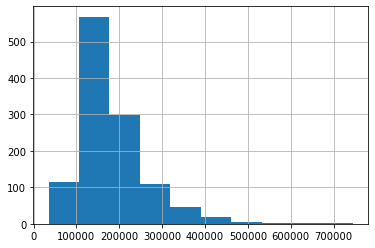

In [4]:
y_train['SalePrice'].hist()

<AxesSubplot:>

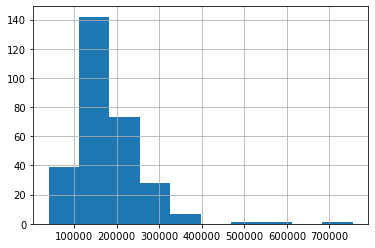

In [5]:
y_test['SalePrice'].hist()

In [6]:
X_train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1163
MiscFeature     1124
Alley           1098
Fence            937
FireplaceQu      553
LotFrontage      212
GarageType        61
GarageYrBlt       61
GarageQual        61
GarageCond        61
GarageFinish      61
BsmtExposure      30
BsmtCond          29
BsmtFinType2      29
BsmtFinType1      29
BsmtQual          29
MasVnrArea         6
MasVnrType         6
Electrical         1
BedroomAbvGr       0
dtype: int64

In [7]:
X_test.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          290
MiscFeature     282
Alley           271
Fence           242
FireplaceQu     137
LotFrontage      47
GarageType       20
GarageYrBlt      20
GarageQual       20
GarageCond       20
GarageFinish     20
BsmtFinType2      9
BsmtCond          8
BsmtFinType1      8
BsmtQual          8
BsmtExposure      8
MasVnrArea        2
MasVnrType        2
BedroomAbvGr      0
BsmtFullBath      0
dtype: int64

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 81 to 1140
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          70 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

#### Preprocessing

In [9]:
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])
target = y_train['SalePrice']

X_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
81,120,32.0,4500,6,5,1998,1998,443.0,1201,0,36,1237,1337,0,0,1337,1,0,2,0,2,1,5,0,1998.0,2,405,0,199,0,0,0,0,0,3,2006
1418,20,71.0,9204,5,5,1963,1963,0.0,25,872,247,1144,1144,0,0,1144,1,0,1,1,3,1,6,0,1962.0,1,336,0,88,0,0,0,0,0,8,2008
1212,30,50.0,9340,4,6,1941,1950,0.0,344,0,328,672,672,0,0,672,1,0,1,0,2,1,4,0,1941.0,1,234,0,113,0,0,0,0,0,8,2009


In [10]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [11]:
X_train

array([[1.20000000e+02, 3.20000000e+01, 4.50000000e+03, ...,
        0.00000000e+00, 3.00000000e+00, 2.00600000e+03],
       [2.00000000e+01, 7.10000000e+01, 9.20400000e+03, ...,
        0.00000000e+00, 8.00000000e+00, 2.00800000e+03],
       [3.00000000e+01, 5.00000000e+01, 9.34000000e+03, ...,
        0.00000000e+00, 8.00000000e+00, 2.00900000e+03],
       ...,
       [6.00000000e+01, 8.90000000e+01, 1.16450000e+04, ...,
        0.00000000e+00, 8.00000000e+00, 2.00600000e+03],
       [6.00000000e+01, 7.00700837e+01, 7.50000000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.01000000e+03],
       [2.00000000e+01, 6.00000000e+01, 7.35000000e+03, ...,
        0.00000000e+00, 6.00000000e+00, 2.00800000e+03]])

In [12]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.15, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((992, 36), (176, 36), (992,), (176,))

#### Model

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [15]:
model = XGBRegressor()
model.fit(X_tr, y_tr, verbose=False)
pred = model.predict(X_val)

print("R2 : " + str(r2_score(y_val, pred)))
print("RMSE : " + str(rmse(y_val, pred)))

R2 : 0.8534731687038711
RMSE : 31827.55779287209


In [16]:
model = RandomForestRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

print("R2 : " + str(r2_score(y_val, pred)))
print("RMSE : " + str(rmse(y_val, pred)))

R2 : 0.8513167297620332
RMSE : 32060.905852658452


In [17]:
y = y_train['SalePrice']

In [18]:
final_model = XGBRegressor()
final_model.fit(X_train, y)

prediction = final_model.predict(X_test)

#### Prediction & to CSV

In [19]:
submission = pd.DataFrame(data={
    'Id': y_test.Id,
    'income' : prediction
})

submission.head()

,Id,income
1380,1381,79665.031250
520,521,112973.062500
1175,1176,327729.593750
351,352,184498.734375
1335,1336,155756.921875


#### 결과 가채점

In [20]:
pred = model.predict(X_test)
print("RMSE : " + str(rmse(y_test['SalePrice'], prediction)))
print("R2 : " + str(r2_score(y_test['SalePrice'], prediction)))

RMSE : 25308.81766179412
R2 : 0.8902345949704513


## T2-5. Insurance Forecast (Regression)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("data/BDC/insurance/insurance.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='charges')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 7), (268, 7), (1070, 2), (268, 2))

#### EDA

In [2]:
X_train.head()

,id,age,sex,bmi,children,smoker,region
209,209,40,male,41.230,1,no,northeast
540,540,34,female,38.000,3,no,southwest
747,747,19,male,21.755,0,no,northwest
39,39,60,male,39.900,0,yes,southwest
640,640,33,male,42.400,5,no,southwest


In [3]:
y_train.head()

,id,charges
209,209,6610.10970
540,540,6196.44800
747,747,1627.28245
39,39,48173.36100
640,640,6666.24300


<AxesSubplot:>

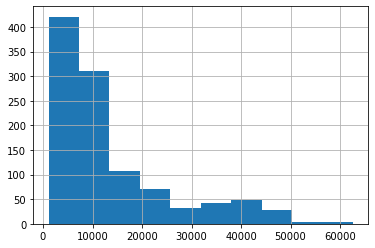

In [4]:
y_train['charges'].hist()

In [5]:
X_train.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [6]:
X_test.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 209 to 1140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 66.9+ KB


In [8]:
X_train.select_dtypes("object").columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [9]:
# Train ['sex', 'smoker', 'region']
cols = X_train.select_dtypes("object").columns

for col in cols:
    print("\n=====", col, "=====")
    print("[train]")
    print(X_train[col].value_counts())
    print("[test]")
    print(X_test[col].value_counts())


===== sex =====
[train]
male      551
female    519
Name: sex, dtype: int64
[test]
female    143
male      125
Name: sex, dtype: int64

===== smoker =====
[train]
no     845
yes    225
Name: smoker, dtype: int64
[test]
no     219
yes     49
Name: smoker, dtype: int64

===== region =====
[train]
southeast    304
northeast    266
southwest    261
northwest    239
Name: region, dtype: int64
[test]
northwest    86
southwest    64
southeast    60
northeast    58
Name: region, dtype: int64


#### Preprocessing

Categorical Variables

In [11]:
X_train = pd.get_dummies(X_train, columns = cols)
X_test = pd.get_dummies(X_test, columns = cols)

In [12]:
X_train.head(2)

,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
209,209,40,41.23,1,0,1,1,0,1,0,0,0
540,540,34,38.00,3,1,0,1,0,0,0,0,1


log Transform

<AxesSubplot:>

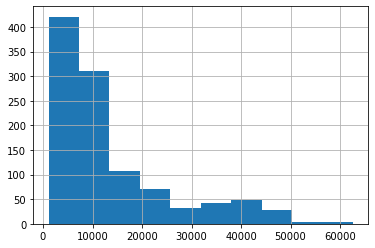

In [13]:
y_train['charges'].hist()

In [14]:
y_train['charges'] = np.log1p(y_train['charges'])

<AxesSubplot:>

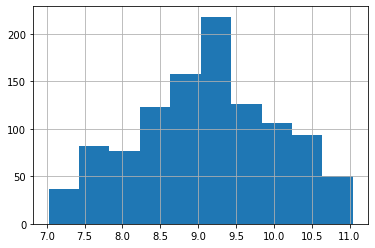

In [15]:
y_train['charges'].hist()

Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['bmi'] = scaler.fit_transform(X_train[['bmi']])
X_test['bmi'] = scaler.transform(X_test[['bmi']])

label encoding

In [17]:
# 나이를 10대, 20대, 30대로 구분하기 위해 10을 나눈 몫 값만 구함
X_train['age'] = X_train['age'].apply(lambda x: x//10)
X_test['age'] = X_test['age'].apply(lambda x: x//10)

In [18]:
X_train.head(3)

,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
209,209,4,1.707232,1,0,1,1,0,1,0,0,0
540,540,3,1.180775,3,1,0,1,0,0,0,0,1
747,747,1,-1.466991,0,0,1,1,0,0,1,0,0


Train-Validation Split

In [19]:
target = y_train['charges']
X_train = X_train.drop('id', 1)

/var/folders/mt/cl5sbk5935d2kz0_4_5kxkkr0000gn/T/ipykernel_2347/1247707697.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop('id', 1)


In [20]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.15, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((909, 11), (161, 11), (909,), (161,))

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

In [22]:
from sklearn.metrics import mean_squared_error
def rmse2(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse2(y_val, pred)

0.38616240437335353

In [23]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

rmse(y_val, pred)

0.38616240437335353

In [24]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_val)

In [25]:
rmse2(y_val, pred)

0.39580148944349686

In [26]:
rf.fit(X_train, y_train['charges'])
pred = rf.predict(X_test.drop('id',1))

/var/folders/mt/cl5sbk5935d2kz0_4_5kxkkr0000gn/T/ipykernel_2347/1322976488.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pred = rf.predict(X_test.drop('id',1))


In [27]:
pred = np.exp(pred)
output = pd.DataFrame({'id': y_test['id'], 'charges':pred})
output.head()

,id,charges
1088,1088,9706.962010
1157,1157,4176.248954
1267,1267,34140.664114
506,506,2745.244868
659,659,12424.046359


#### 결과 채점

In [28]:
rmse(y_test['charges'], pred)

4773.167352444486

## T2-6. Bike-Regressor

### Baseline code
- target: count컬럼

In [1]:
import pandas as pd

train = pd.read_csv("data/BDC/bike-sharing-demand/train.csv")
test = pd.read_csv("data/BDC/bike-sharing-demand/test.csv")

#### EDA

In [3]:
# 데이터 크기
train.shape, test.shape

((10886, 12), (6493, 9))

In [4]:
# 데이터 샘플
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [5]:
# 데이터 샘플
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [6]:
# 결측값 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# 결측값 확인
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<AxesSubplot:>

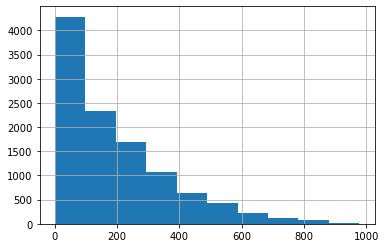

In [8]:
train['count'].hist()

#### Preprocessing

In [9]:
# datetime

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day

train = train.drop('datetime', axis=1)
test = test.drop('datetime', axis=1)

In [10]:
# test에는 없는 컬럼 삭제
train = train.drop(['casual', 'registered'], axis=1)
train.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1


In [11]:
# target 별도 저장
target = train.pop('count')
target

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2023)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8708, 11), (2178, 11), (8708,), (2178,))

#### Liner Regression

In [13]:
# 평가
from sklearn.metrics import r2_score

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_val)
r2_score(y_val, pred)

0.3078047692628141

#### RandomForest

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_val)
r2_score(y_val, pred)

0.43735201311075

#### XGBoost

In [16]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
r2_score(y_val, pred)

0.40839958233431084

In [17]:
# 하이퍼파라미터 
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=9)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
r2_score(y_val, pred)

0.4473182182516243

#### Predict

In [18]:
# 예측
pred = xgb.predict(test)
pred

array([ 86.14312,  67.58316,  67.58316, ..., 146.57967, 109.61407,
       178.52168], dtype=float32)

In [20]:
# csv 파일 생성
test = pd.read_csv("data/BDC/bike-sharing-demand/test.csv")

submit = pd.DataFrame({
    'datetime': test['datetime'],
    'count': pred
})

In [22]:
# 점검
# print(pd.read_csv("submission.csv"))
print(submit.shape, test.shape)

(6493, 2) (6493, 9)


## 2회 기출 유형

## 작업형 2번

### 제품 배송 시간에 맞춰 배송되었는지 예측모델 만들기

#### 학습용 데이터 (X_train, y_train)을 이용하여 배송 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측 확률값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

- 유의사항
    - 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
    - 수험번호.csv파일이 만들어지도록 코드를 제출한다.
    - 제출한 모델의 성능은 ROC-AUC형태로 읽어드린다.

In [2]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("data/BDC/customer-analytics/Train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Reached.on.Time_Y.N', id_name='ID')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8799, 11), (2200, 11), (8799, 2), (2200, 2))

#### EDA

In [4]:
# 데이터 확인
print(X_train.shape)
X_train

(8799, 11)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
3999,4000,B,Ship,3,4,134,3,high,F,6,5680
9559,9560,F,Ship,4,3,173,3,medium,M,5,5331
2649,2650,B,Ship,2,1,192,3,high,M,46,3206
4843,4844,F,Ship,6,5,284,4,medium,M,8,5346
9601,9602,F,Flight,3,1,246,3,low,F,10,4707
...,...,...,...,...,...,...,...,...,...,...,...
3934,3935,C,Ship,6,5,178,3,low,F,5,4096
2669,2670,F,Ship,3,1,206,2,medium,F,56,2069
1152,1153,D,Ship,4,1,135,10,medium,M,35,1989
6201,6202,B,Ship,4,4,251,2,medium,F,6,4376


In [5]:
print(y_train.shape)
y_train

(8799, 2)


,ID,Reached.on.Time_Y.N
3999,4000,0
9559,9560,1
2649,2650,1
4843,4844,1
9601,9602,1
...,...,...
3934,3935,0
2669,2670,1
1152,1153,1
6201,6202,0


In [6]:
# 레이블(타겟) 확인
y_train['Reached.on.Time_Y.N'].value_counts()

1    5251
0    3548
Name: Reached.on.Time_Y.N, dtype: int64

In [7]:
# X_train 결측치 확인
X_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [8]:
# X_test 결측치 확인
X_test.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [9]:
# 데이터 타입 확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 3999 to 9332
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8799 non-null   int64 
 1   Warehouse_block      8799 non-null   object
 2   Mode_of_Shipment     8799 non-null   object
 3   Customer_care_calls  8799 non-null   int64 
 4   Customer_rating      8799 non-null   int64 
 5   Cost_of_the_Product  8799 non-null   int64 
 6   Prior_purchases      8799 non-null   int64 
 7   Product_importance   8799 non-null   object
 8   Gender               8799 non-null   object
 9   Discount_offered     8799 non-null   int64 
 10  Weight_in_gms        8799 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 824.9+ KB


In [10]:
# object 타입 컬럼, 고유값 개수 확인
X_train[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']].nunique()

Warehouse_block       5
Mode_of_Shipment      3
Product_importance    3
Gender                2
dtype: int64

#### Preprocessing

In [11]:
# object 컬럼 삭제 (또는 라벨인코딩, 원핫인코딩)
X_train = X_train.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)
X_test = X_test.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)
X_train

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
3999,4000,3,4,134,3,6,5680
9559,9560,4,3,173,3,5,5331
2649,2650,2,1,192,3,46,3206
4843,4844,6,5,284,4,8,5346
9601,9602,3,1,246,3,10,4707
...,...,...,...,...,...,...,...
3934,3935,6,5,178,3,5,4096
2669,2670,3,1,206,2,56,2069
1152,1153,4,1,135,10,35,1989
6201,6202,4,4,251,2,6,4376


#### 모델 및 평가

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [13]:
X_train_id = X_train.pop('ID')
X_test_id = X_test.pop('ID')

In [14]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train['Reached.on.Time_Y.N'],test_size=0.2,random_state=2021)

In [15]:
from sklearn.metrics import roc_auc_score

In [16]:
model = LogisticRegression()
model.fit(X_tr, y_tr)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.7248437200995088

In [17]:
model = KNeighborsClassifier()
model.fit(X_tr, y_tr)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.7315201675490633

In [18]:
model = DecisionTreeClassifier()
model.fit(X_tr, y_tr)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.6288724458335991

In [19]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.741295634794072

In [20]:
model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_tr, y_tr)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.7335108758053199

#### 모델 선택 및 결과 출력

In [21]:
model = KNeighborsClassifier()
model.fit(X_train, y_train['Reached.on.Time_Y.N'])
pred = model.predict_proba(X_test)
pred

array([[0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       ...,
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4]])

In [22]:
submission = pd.DataFrame({
        "ID": X_test_id,
        "Reached.on.Time_Y.N": pred[:,1]
    })

In [23]:
submission.head()

,ID,Reached.on.Time_Y.N
4732,4733,0.6
2039,2040,1.0
5113,5114,0.2
2360,2361,1.0
5995,5996,0.6


In [26]:
# submission.to_csv('submission.csv', index=False)  ## 수험번호.csv

#### 결과 가채점

In [27]:
# 검증데이터(val)보다 조금 떨어진 성능을 보여주고 있음
pred = model.predict_proba(X_test)
roc_auc_score(y_test['Reached.on.Time_Y.N'], pred[:,1])

0.7141133130081301

## 3회 기출 유형

## 작업형 2번

### 여행 보험 패키지 상품을 구매할 확률 값을 구하시오

- 예측할 값(y): TravelInsurance (여행보험 패지지를 구매 했는지 여부 0:구매안함, 1:구매)
- 평가: roc-auc 평가지표

In [1]:
# 라이브러리 불러오기
import pandas as pd

In [2]:
# 데이터 불러오기
train = pd.read_csv("data/kaggle_data/big-data-analytics-certification/t2-1-train.csv")
test = pd.read_csv("data/kaggle_data/big-data-analytics-certification/t2-1-test.csv")

#### EDA

In [3]:
# 데이터 사이즈
train.shape, train.shape

((1490, 10), (1490, 10))

In [4]:
# 샘플 확인
train.head()

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,10000,28,Private Sector/Self Employed,Yes,1250000.0,6,1,No,No,0
1,10001,31,Private Sector/Self Employed,Yes,1250000.0,7,1,No,No,0
2,10002,29,Private Sector/Self Employed,Yes,1200000.0,7,0,No,No,1
3,10003,33,Government Sector,Yes,650000.0,6,1,No,No,1
4,10004,28,Private Sector/Self Employed,Yes,800000.0,6,0,No,Yes,1


In [5]:
# type 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1490 non-null   int64  
 1   Age                  1490 non-null   int64  
 2   Employment Type      1490 non-null   object 
 3   GraduateOrNot        1490 non-null   object 
 4   AnnualIncome         1486 non-null   float64
 5   FamilyMembers        1490 non-null   int64  
 6   ChronicDiseases      1490 non-null   int64  
 7   FrequentFlyer        1490 non-null   object 
 8   EverTravelledAbroad  1490 non-null   object 
 9   TravelInsurance      1490 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 116.5+ KB


In [6]:
# 카테고리 수 확인 (train과 test 다를 경우)
train.describe(include="object")

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1490,1490,1490,1490
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1056,1270,1175,1209


In [7]:
test.describe(include="object")

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,497,497,497,497
unique,3,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,360,422,395,398


In [8]:
# Employment Type 컬럼 카테고리
train['Employment Type'].value_counts()

Private Sector/Self Employed    1056
Government Sector                434
Name: Employment Type, dtype: int64

In [9]:
# Employment Type 컬럼 카테고리
test['Employment Type'].value_counts()

Private Sector/Self Employed    360
Government Sector               134
Casual employment                 3
Name: Employment Type, dtype: int64

In [10]:
# 수치형 통계 값
train.describe(exclude="object")

,id,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.486000e+03,1490.000000,1490.000000,1490.000000
mean,10744.500000,29.600000,9.311238e+05,4.755705,0.280537,0.352349
std,430.270264,2.887829,3.764874e+05,1.603613,0.449412,0.477862
min,10000.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,10372.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,10744.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,11116.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,11489.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [11]:
# 수치형 통계 값
test.describe(exclude="object")

,id,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.940000e+02,497.000000,497.000000
mean,248.000000,29.800805,9.393725e+05,4.744467,0.269618
std,143.615807,2.986286,3.792988e+05,1.629211,0.444208
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000
25%,124.000000,28.000000,6.000000e+05,4.000000,0.000000
50%,248.000000,29.000000,9.000000e+05,5.000000,0.000000
75%,372.000000,33.000000,1.250000e+06,6.000000,1.000000
max,496.000000,35.000000,1.750000e+06,9.000000,1.000000


In [12]:
# 결측치 확인
train.isnull().sum()

id                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           4
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [13]:
# 결측치 확인
test.isnull().sum()

id                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           3
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [14]:
# target
train['TravelInsurance'].value_counts()

0    965
1    525
Name: TravelInsurance, dtype: int64

#### Data pre-processing

In [15]:
# 결측치 처리
train['AnnualIncome'] = train['AnnualIncome'].fillna(train['AnnualIncome'].mean())
test['AnnualIncome'] = test['AnnualIncome'].fillna(test['AnnualIncome'].mean())

In [16]:
# target값 변수에 옮기기
target = train.pop('TravelInsurance')

In [17]:
# 데이터 합치기
df = pd.concat([train, test])
df.shape

(1987, 9)

In [18]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

cols = df.select_dtypes(include="object").columns
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

In [19]:
# train test 다시 분리
train = df[:train.shape[0]].copy()
test = df[train.shape[0]:].copy()

In [20]:
# 스케일
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train['AnnualIncome'] = scaler.fit_transform(train[['AnnualIncome']])
test['AnnualIncome'] = scaler.transform(test[['AnnualIncome']])

#### 검증 데이터 분리

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1192, 9), (298, 9), (1192,), (298,))

#### 모델 학습 및 평가

In [22]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)

In [23]:
# 평가
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, pred[:,1])

0.6987878787878787

In [24]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.7659090909090909

In [25]:
# xgboost
import xgboost as xgb
model = xgb.XGBRFClassifier(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.7629292929292929

#### 예측

In [26]:
# test 데이터 예측
model = RandomForestClassifier(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict_proba(test)

In [27]:
# 예측한 데이터 -> 데이터프레임으로
submit = pd.DataFrame()
submit['id'] = test['id']
submit['TravelInsurance'] = pred[:,1]

In [28]:
# 예측한 데이터 확인
submit.head()

,id,TravelInsurance
0,0,0.30
1,1,0.48
2,2,0.30
3,3,0.83
4,4,0.28


In [29]:
# csv 저장
# submit.to_csv("2022.csv", index=False)
# csv 확인
# pd.read_csv("2022.csv")

## 4회 기출 유형

## 작업형 2번

### 자동차 회사는 새로운 전략을 수립하기 위해 4개의 시장으로 세분화했습니다. 기존 고객 분류 자료를 바탕으로 신규 고객이 어떤 분류에 속할지 예측하시오.

- 예측할 값(y): "Segmentation" (1,2,3,4)
- 평가: Macro f1-score

In [1]:
# 라이브러리 불러오기
import pandas as pd

In [2]:
# 데이터 불러오기
train = pd.read_csv("data/kaggle_data/big-data-analytics-certification-kr-2022/train.csv")
test = pd.read_csv("data/kaggle_data/big-data-analytics-certification-kr-2022/test.csv")

#### EDA

In [3]:
# 데이터 크기 확인
train.shape, test.shape

((6665, 11), (2154, 10))

In [4]:
# 데이터 크기 확인
train.shape, test.shape

((6665, 11), (2154, 10))

In [5]:
# test 샘플 확인 
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
3,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
4,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6


In [6]:
# target 확인
train['Segmentation'].value_counts()

4    1757
3    1720
1    1616
2    1572
Name: Segmentation, dtype: int64

In [7]:
# 결측치 확인(train)
train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [8]:
# 결측치 확인(test)
test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [9]:
# type 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 572.9+ KB


In [10]:
# 범주형 변수
train.select_dtypes(include='object').columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')

In [11]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1']

In [12]:
## label encoding
## Series.astype('category').cat.codes
train['Gender'] = train['Gender'].astype('category').cat.codes
train['Ever_Married'] = train['Ever_Married'].astype('category').cat.codes
train['Graduated'] = train['Graduated'].astype('category').cat.codes
train['Profession'] = train['Profession'].astype('category').cat.codes
train['Spending_Score'] = train['Spending_Score'].astype('category').cat.codes
train['Var_1'] = train['Var_1'].astype('category').cat.codes
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,4
1,466315,0,1,67,1,2,1.0,2,1.0,5,2
2,461735,1,1,67,1,7,0.0,1,2.0,5,2
3,461319,1,1,56,0,0,0.0,0,2.0,5,3
4,460156,1,0,32,1,5,1.0,2,3.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...
6660,463002,1,1,41,1,0,0.0,1,5.0,5,2
6661,464685,1,0,35,0,4,3.0,2,4.0,3,4
6662,465406,0,0,33,1,5,1.0,2,1.0,5,4
6663,467299,0,0,27,1,5,1.0,2,4.0,5,2


In [13]:
## cat.codes의 label 인코딩은 ABC 순대로 되는 것을 확인할 수 있다
test['Profession'].astype('category').cat.categories

Index(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'],
      dtype='object')

In [14]:
## label encoding
test['Gender'] = test['Gender'].astype('category').cat.codes
test['Ever_Married'] = test['Ever_Married'].astype('category').cat.codes
test['Graduated'] = test['Graduated'].astype('category').cat.codes
test['Profession'] = test['Profession'].astype('category').cat.codes
test['Spending_Score'] = test['Spending_Score'].astype('category').cat.codes
test['Var_1'] = test['Var_1'].astype('category').cat.codes
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1,36,1,2,0.0,2,1.0,5
1,458994,1,1,37,1,5,8.0,0,4.0,5
2,459000,1,1,59,0,4,11.0,1,2.0,5
3,459003,1,1,47,1,1,0.0,1,5.0,3
4,459005,1,1,61,1,1,5.0,2,3.0,5
...,...,...,...,...,...,...,...,...,...,...
2149,467950,0,0,35,1,3,1.0,2,2.0,5
2150,467954,1,0,29,0,5,9.0,2,4.0,5
2151,467958,0,0,35,1,1,1.0,2,1.0,5
2152,467961,1,1,47,1,4,1.0,1,5.0,3


In [15]:
# ID, target 처리
target = train.pop('Segmentation')
train = train.drop("ID", axis=1)
test_ID = test.pop('ID')

In [16]:
# 모델 선택
# 하이퍼파라미터 튜닝: max_depth, n_estimators
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, max_depth=7, n_estimators=500)

In [17]:
# 교차 검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, train, target, scoring='f1_macro', cv=5)
print(scores)
print(scores.mean())

[0.53130191 0.51695963 0.52121909 0.54069647 0.51119827]
0.5242750727554509


In [18]:
# 학습
rf.fit(train, target)
pred = rf.predict(test)
pred

array([1, 3, 2, ..., 1, 2, 4])

In [19]:
# 예측 결과 -> 데이터 프레임
# pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

submit = pd.DataFrame({
    'ID': test_ID,
    'Segmentation': pred
})
# submit.to_csv("submission.csv", index=False)
# Score: 0.32046

## 2회 기출 유형

## 작업형 1번

### 문제1
- 데이터셋(basic1.csv)의 'f5' 컬럼을 기준으로 상위 10개의 데이터를 구하고, 'f5'컬럼 10개 중 최소값으로 데이터를 대체한 후, 'age'컬럼에서 80 이상인 데이터의'f5 컬럼 평균값 구하기

In [2]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/kaggle_data/bigdatacertificationkr/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [3]:
# f5컬럼을 기준으로 내림차순 정렬
df = df.sort_values('f5', ascending=False)
df.head(10)

,id,age,city,f1,f2,f3,f4,f5
10,id11,40.0,서울,68.0,0,NaN,ENFP,98.429899
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
9,id10,95.0,서울,74.0,1,NaN,ISFP,98.429899
76,id77,77.0,경기,31.0,0,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
91,id92,97.0,경기,78.0,1,NaN,INFP,97.381034
86,id87,19.0,경기,NaN,1,NaN,ISFP,97.381034
71,id72,8.0,경기,97.0,0,NaN,ESTJ,97.381034
11,id12,20.0,서울,NaN,0,NaN,ESTP,91.297791
19,id20,11.0,서울,51.0,1,NaN,INTJ,91.297791


In [4]:
# 최소값 찾기
min = df['f5'][:10].min()
# min = 91.297791
min

91.29779092

In [5]:
df.iloc[:10,-1] = min
df.head(10)

,id,age,city,f1,f2,f3,f4,f5
10,id11,40.0,서울,68.0,0,NaN,ENFP,91.297791
97,id98,39.0,경기,58.0,2,NaN,INFP,91.297791
9,id10,95.0,서울,74.0,1,NaN,ISFP,91.297791
76,id77,77.0,경기,31.0,0,NaN,INFP,91.297791
98,id99,1.0,경기,47.0,0,NaN,ESFJ,91.297791
91,id92,97.0,경기,78.0,1,NaN,INFP,91.297791
86,id87,19.0,경기,NaN,1,NaN,ISFP,91.297791
71,id72,8.0,경기,97.0,0,NaN,ESTJ,91.297791
11,id12,20.0,서울,NaN,0,NaN,ESTP,91.297791
19,id20,11.0,서울,51.0,1,NaN,INTJ,91.297791


In [6]:
# 80세 이상의 f5컬럼 평균
print(df[df['age']>=80]['f5'].mean())

62.497747125217394


### 문제2
- 데이터셋(basic1.csv)의 앞에서 순서대로 70% 데이터만 활용해서, 'f1'컬럼 결측치를 중앙값으로 채우기 전후의 표준편차를 구하고 두 표준편차 차이 계산하기

In [12]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/kaggle_data/bigdatacertificationkr/basic1.csv')

In [21]:
# 데이터 나누기 방법1
# data70 = df.iloc[:70]
# data30 = df.iloc[70:]

# [심화학습] 데이터 나누기 방법2
# data70, data30 = np.split(df, [int(.7*len(df))])

# [심화학습] 데이터 나누기 방법3 (랜덤으로 샘플링하라고 했을 때!!)
data70 = df.sample(frac = 0.7)
data70 = df.drop(data70.index)

data70.tail()

,id,age,city,f1,f2,f3,f4,f5
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [22]:
## 결측치 확인
data70.isnull().sum()

id       0
age      0
city     0
f1       9
f2       0
f3      30
f4       0
f5       0
dtype: int64

In [23]:
## 결측치 채우기 전 f1컬럼 표준편자
std1 = data70['f1'].std()
std1

18.650673420753982

In [24]:
## 중앙값 확인
med=data70['f1'].median()
med

62.0

In [25]:
## 중앙값으로 채우기
# data70['f1'] = data70['f1'].fillna(med)

## 다른 방법들
# data70['f1']= data70['f1'].replace(np.nan, med)
data70 = data70.fillna(value=med)

In [26]:
## 결측치 확인
data70.isnull().sum()

id      0
age     0
city    0
f1      0
f2      0
f3      0
f4      0
f5      0
dtype: int64

In [27]:
## 결측치를 채운 후 표준편차 구하기
std2 = data70['f1'].std()
std2

15.60301326630551

In [28]:
print(std1-std2)

3.0476601544484723


### 문제3
- 데이터셋(basic1.csv)의 'age'컬럼의 이상치를 더하시오! (단, 평균으로부터 '표준편차*1.5'를 벗어나는 영역을 이상치라고 판단함)

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/kaggle_data/bigdatacertificationkr/basic1.csv')

In [2]:
std = df['age'].std() * 1.5
mean = df['age'].mean()

min_out = mean - std
max_out = mean + std
print(min_out, max_out)

5.298862216116952 96.62713778388306


In [5]:
# 이상치 age합
# df[(df['age']>max_out)|(df['age']<min_out)]['age'].sum()

# 다르게 작성방법
df.loc[(df['age'] > max_out)]['age'].sum() + df.loc[(df['age']< min_out)]['age'].sum()

473.5

## 3회 기출 유형

## 작업형 1번

### 문제1
- 2022년 데이터 중 2022년 중앙값보다 큰 값의 데이터 수

In [1]:
import pandas as pd
df = pd.read_csv("data/kaggle_data/big-data-analytics-certification/t1-data2.csv", index_col='year')
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
year,,,,,,,,,,,,,,,,,,,,,
2022년,69,37,57,70,40,75,8,67,89,91,...,79,56,98,21,14,25,17,10,60,17
2023년,52,13,22,70,92,80,8,56,17,96,...,62,47,59,6,25,96,69,87,28,64
2024년,88,44,32,55,64,8,4,2,62,44,...,98,95,40,59,69,71,86,53,93,64
2025년,80,97,15,4,74,12,100,60,47,47,...,30,11,2,54,9,52,51,81,78,22
2026년,64,66,62,56,67,80,90,24,58,78,...,93,15,88,67,7,82,5,61,15,63


In [2]:
# solution
m = df.loc["2022년"].median()
print(sum(df.loc["2022년",:] > m))

50


### 문제2
- 결측치 데이터(행)을 제거하고, 앞에서부터 60% 데이터만 활용해, 'f1' 컬럼 3사분위 값을 구하시오
    - 60%가 소수점일 경우 절사(예: 36.6 일때 36으로 계산)
    - data: t1-data1.csv

In [2]:
import pandas as pd
df = pd.read_csv("data/kaggle_data/big-data-analytics-certification/t1-data1.csv")
df

,id,age,city,f1,f2,f4,f5
0,id01,2.0,서울,NaN,0,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,INFP,52.667078
4,id05,24.0,서울,85.0,2,ISFJ,29.269869
...,...,...,...,...,...,...,...
85,id86,2.0,경기,NaN,0,ESTP,29.269869
86,id87,19.0,경기,NaN,1,ISFP,97.381034
87,id88,89.0,경기,75.0,0,ESTJ,60.339826
88,id89,34.0,경기,66.0,1,ENTJ,33.308999


In [3]:
df = df.dropna()
df = df.iloc[:int(len(df)*0.6)]
print(df['f1'].quantile(.75))

77.25


### 문제3
- 결측치가 제일 큰 값의 컬럼명을 구하시오

In [3]:
import pandas as pd
df = pd.read_csv("data/kaggle_data/big-data-analytics-certification/t1-data1.csv")
df

,id,age,city,f1,f2,f4,f5
0,id01,2.0,서울,NaN,0,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,INFP,52.667078
4,id05,24.0,서울,85.0,2,ISFJ,29.269869
...,...,...,...,...,...,...,...
85,id86,2.0,경기,NaN,0,ESTP,29.269869
86,id87,19.0,경기,NaN,1,ISFP,97.381034
87,id88,89.0,경기,75.0,0,ESTJ,60.339826
88,id89,34.0,경기,66.0,1,ENTJ,33.308999


In [2]:
df = pd.DataFrame(df.isnull().sum(), columns=['cnt_null'])
df = df['cnt_null'].sort_values(ascending=False)
print(df.index[0])

f1


In [4]:
df = df.isnull().sum()
print(df.index[3])

f1


## 4회 기출 유형

## 작업형 1번

### 문제1
- age 컬럼의 3사분위수와 1사분위수의 차를 절대값으로 구하고, 소수점 버려서, 정수로 출력

In [1]:
import pandas as pd
df = pd.read_csv("data/kaggle_data/bigdatacertificationkr/basic1.csv")

In [2]:
print("1사분위: ",df['age'].quantile(0.25))
print("3사분위: ",df['age'].quantile(0.75))

1사분위:  26.875
3사분위:  77.0


In [3]:
result = abs(df['age'].quantile(0.25) - df['age'].quantile(0.75))

print("절대값 차이: ",result)

절대값 차이:  50.125


### 문제2
- (loves반응+wows반응)/(reactions반응) 비율이 0.4보다 크고 0.5보다 작으면서, status_type=='video'인 데이터의 갯수

In [1]:
import pandas as pd
df = pd.read_csv("data/kaggle_data/big-data-analytics-certification-kr-2022/fb.csv")
df

,id,type,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,89,0,0,89,0,0,0,0,0
7046,7047,photo,16,0,0,14,1,0,1,0,0
7047,7048,photo,2,0,0,1,1,0,0,0,0
7048,7049,photo,351,12,22,349,2,0,0,0,0


In [2]:
cond1 = (df['loves'] + df['wows'])/ df['reactions'] > 0.4
cond2 = (df['loves'] + df['wows'])/ df['reactions'] < 0.5
cond3 = df['type'] == 'video'

print(len(df[cond1 & cond2 & cond3]))

90
